In [0]:
import pandas as pd
import numpy as np
from sklearn import svm

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

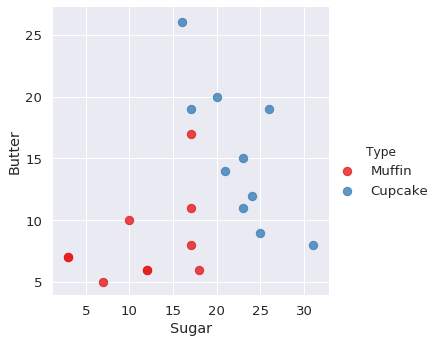

In [25]:
recipes = pd.read_csv('cupcakes_muffins.csv')
recipes.head()

sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [0]:
sugar_butter = recipes[['Sugar', 'Butter']].values
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

# C parameter allows you to decide how much you want to misclassify points
model = svm.SVC(kernel='linear', C=2**-5) # try C=2**-5 for overfit line
model.fit(sugar_butter, type_label)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a*xx - (model.intercept_[0]) / w[1]

#b = model.support_vectors_[0]
#yy_down = a * xx + (b[1] - a * b[0])
#b = model.support_vectors_[-1]
#yy_up = a * xx + (b[1] - a * b[0])

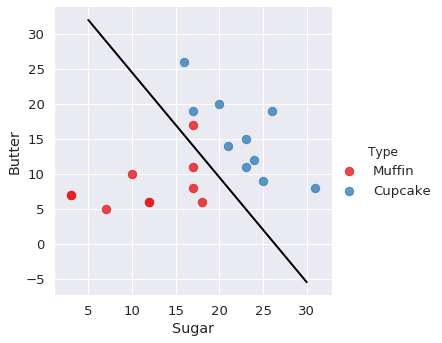

In [29]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
#plt.plot(xx, yy_down, 'k--')
#plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[
            :, 1], s=80, facecolors='none')

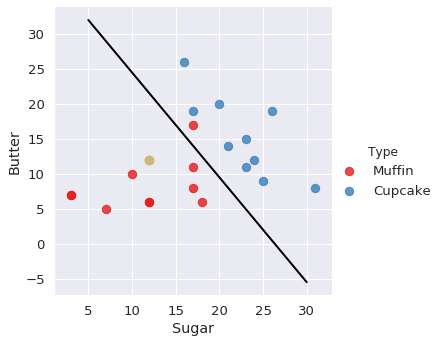

In [30]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(12,12, 'yo', markersize='9')

In [31]:
def muffin_or_cupcake(butter, sugar):
  if(model.predict([[butter, sugar]]))==0:
    print("You\'re looking at a muffin recipe.")
  else:
    print("You\'re looking at a cupcake recipe.")

muffin_or_cupcake(12,12)

You're looking at a muffin recipe.
